<img src="AV_Logo.png" style="width: 200px;height: 75px"/>

Table of Contents
--------------
* [Evaluation of Predictive Models](Evaluation-of-Predictive-Models)
* [Types of Predictive Models](Types-of-Predictive-Models)
* [Confusion Matrix](Confusion-Matrix)
* [Area Under the ROC curve (AUC – ROC)](Area-Under-the-ROC-curve-(AUC-–-ROC))
* [Cross Validation](Cross-Validation)
* [RMSE](Root-Mean-Squared-Error)

## Evaluation of Predictive Models

Predictive Modeling works on constructive feedback principle. You build a model - get feedback from metrics - make improvements and continue until you achieve a desirable accuracy. Evaluation metrics explain the performance of a model. An important aspect of evaluation metrics is their capability to discriminate among model results. Simply, building a predictive model should not be your motive. But, creating and selecting a model which gives high accuracy on out of sample data. Hence, it is crucial to check accuracy of the model prior to computing predicted values.

We consider different kinds of metrics to evaluate our models. The choice of metric completely depends on the type of model and the implementation plan of the model. After you are finished building your model the below metrics will help you in evaluating your model accuracy.

## Types of Predictive Models

When we talk about predictive models, we are talking either about a regression model (continuous output) or a classification model (nominal or binary output). The evaluation metrics used in each of these models are different.

In classification problems, we use two types of algorithms (dependent on the kind of output it creates):

* **Class output** : For instance, in a binary classification problem, the outputs will be either 0 or 1. 

* **Probability output** : For instance, in a binary classification problem, the outputs will be between 0 and 1. Converting probability outputs to class output is just a matter of creating a threshold probability.

In regression problems, we have a continuous value as output. This requires no further treatment.

Let's see some evaluation techniques for various predictive models

#### Confusion Matrix

A confusion matrix is an N X N matrix, where N is the number of classes being predicted. For the problem in hand, we have N=2, and hence we get a 2 X 2 matrix. Here are a few definitions, you need to remember for a confusion matrix :

* **Accuracy** : Proportion of the total number of predictions that were correct.
* **Positive Predictive Value or Precision** : Proportion of positive cases that were correctly identified.
* **Negative Predictive Value** : Proportion of negative cases that were correctly identified.
* **Sensitivity or Recall** : Proportion of actual positive cases which are correctly identified.
* **Specificity** : Proportion of actual negative cases which are correctly identified.

<img src="Confusion_matrix.png" style="width: 500px;height: 150px">

<img src="pivottable.png" style="width: 300px;height: 150px">

Consider the above confusion matrix, the accuracy comes out to be 88%. As you can see from the above two tables, the Positive predictive Value is high, but negative predictive value is quite low. Same holds for Senstivity and Specificity. This is primarily driven by the threshold value we have chosen. If we decrease our threshold value, the two pairs of starkly different numbers will come closer.

In general we are concerned with one of the above defined metric. For instance, in a pharmaceutical company, they will be more concerned with minimal wrong positive diagnosis. Hence, they will be more concerned about high Specificity. On the other hand an attrition model will be more concerned with Senstivity. Confusion matrix are generally used only with class output mode

In [1]:
# import modules
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression

In [2]:
# define logistic regression
logReg = LogisticRegression()

In [3]:
# load dataset
data = pd.read_csv('winequality.csv')

In [4]:
data.head()

,ID,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,W0001,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,W0002,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,NaN,9.5,2
2,W0003,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,NaN,10.1,2
3,W0004,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,W0005,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


In [5]:
# for simplicity, we can convert the problem into a binary classification problem
## the values of target "quality" will then be [0, 1] instead of [1, 2]
data.loc[(data.quality == 2), 'quality'] = 0

In [6]:
# for now, select only two features
X = data[['fixed acidity', 'volatile acidity']]
y = data.quality

In [7]:
# train model
logReg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
# get predictions
pred = logReg.predict(X)

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
# get confusion matrix
C = confusion_matrix(y, pred)
pd.DataFrame(C, index=['Predicted: 0', 'Predicted: 1'], columns=['Actual: 0', 'Actual: 1'])

,Actual: 0,Actual: 1
Predicted: 0,3104,154
Predicted: 1,1450,190


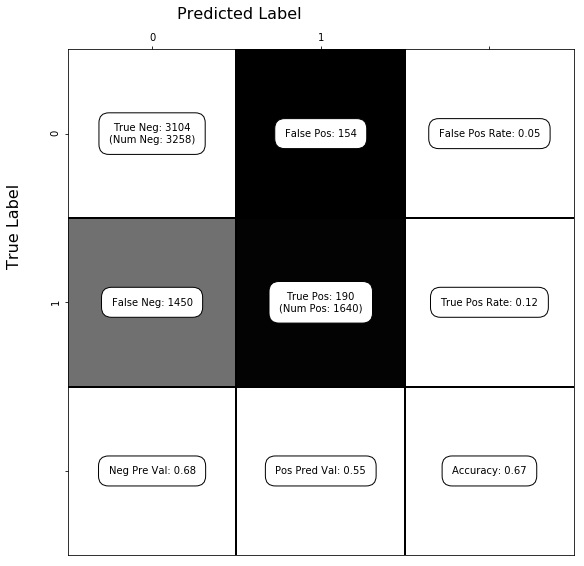

In [11]:
# to print a more intuitive confusion matrix, we are loading a custom 
## function we defined ourselves. Go through "plot_matrix.py" file 
## if you are curious
from plot_matrix import show_confusion_matrix
show_confusion_matrix(C)

**Exercise**:

Q1. Load dataset 'student.csv', select features 'age', 'studytime' and then print confusion matrix for it.

### Area Under the ROC curve (AUC – ROC)

Let’s first try to understand what is ROC (Receiver operating characteristic) curve. If we look at the confusion matrix below, we observe that for a probabilistic model, we get different value for each metric.

<img src="Confusion_matrix.png" style="width: 500px;height: 150px">

Hence, for each sensitivity, we get a different specificity.The two vary as follows:

<img src="curves.png" style="width: 300px;height: 150px">

The ROC curve is the plot between sensitivity and (1- specificity). (1- specificity) is also known as false positive rate and sensitivity is also known as True Positive rate. Following is the ROC curve for the case in hand.

<img src="ROC.png" style="width: 400px;height: 250px">

Let’s take an example of threshold = 0.5 (refer to confusion matrix). Here is the confusion matrix :

<img src="pivottable.png" style="width: 300px;height: 150px">

As you can see, the sensitivity at this threshold is 99.6% and the (1-specificity) is ~60%. This coordinate becomes on point in our ROC curve. To bring this curve down to a single number, we find the area under this curve (AUC).

Note that the area of entire square is 1*1 = 1. Hence AUC itself is the ratio under the curve and the total area. For the case in hand, we get AUC ROC as 96.4%. Following are a few thumb rules:

* 0.90-1 = excellent (A)
* 0.80-0.90 = good (B)
* 0.70-0.80 = fair (C)
* 0.60-0.70 = poor (D)
* 0.50-0.60 = fail (F)



### Points to Remember:

1. For a model which gives class as output, will be represented as a single point in ROC plot.

2. Such models cannot be compared with each other as the judgement needs to be taken on a single metric and not using multiple metrics. For instance, model with parameters (0.2,0.8) and model with parameter (0.8,0.2) can be coming out of the same model, hence these metrics should not be directly compared.

3. In case of probabilistic model, we were fortunate enough to get a single number which was AUC-ROC. But still, we need to look at the entire curve to make conclusive decisions. It is also possible that one model performs better in some region and other performs better in other.

In [12]:
from sklearn.metrics import roc_auc_score

In [13]:
# Note: here we would have to predict probabilities instead of binary classes
pred = logReg.predict_proba(X)

In [14]:
pred

array([[ 0.67115117,  0.32884883],
       [ 0.67565876,  0.32434124],
       [ 0.60649045,  0.39350955],
       ..., 
       [ 0.72147312,  0.27852688],
       [ 0.72111208,  0.27888792],
       [ 0.76677055,  0.23322945]])

In [15]:
roc_auc_score(y, pred[:, 1], )

0.65084650915569919

**Exercise**:

Q1. Load dataset 'student.csv', select features 'age', 'studytime' and then print roc_auc_score for it.

### RMSE(Root Mean Squared Error)

RMSE is the most popular evaluation metric used in regression problems. It follows an assumption that error are unbiased and follow a normal distribution. Here are the key points to consider on RMSE:

* The power of ‘square root’  empowers this metric to show large number deviations.
* The ‘squared’ nature of this metric helps to deliver more robust results which prevents cancelling the positive and negative error values. In other words, this metric aptly displays the plausible magnitude of error term.
* It avoids the use of absolute error values which is highly undesirable in mathematical calculations.
* When we have more samples, reconstructing the error distribution using RMSE is considered to be more reliable.
* RMSE is highly affected by outlier values. Hence, make sure you’ve removed outliers from your data set prior to using this metric.
* As compared to mean absolute error, RMSE gives higher weightage and punishes large errors.

RMSE metric is given by:

<img src="rmse.png" style="width: 250px;height: 100px">

where, N is Total Number of Observations.

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
linReg = LinearRegression()

In [18]:
# dataset for practice hackathon bike sharing (link: https://datahack.analyticsvidhya.com/contest/datahack-hour-bike-sharing/)
data = pd.read_csv('train_ysMSKmQ.csv')
test = pd.read_csv('test_uLBXQQR.csv')

In [19]:
data.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01/01/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,01/01/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,01/01/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,01/01/11,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,01/01/11,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [20]:
X = data.drop(['cnt', 'dteday'], axis=1)
y = data.cnt

X_test = test.drop(['dteday'], axis=1)

In [21]:
linReg.fit(X[['season']], y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
pred = linReg.predict(X[['season']])


In [23]:
from sklearn.metrics import mean_squared_error


In [24]:
np.sqrt(mean_squared_error(y, pred))


159.95424422312684

**Exercise**:

Q1. Calculate RMSE for each single feature and find which gives minimum RMSE score.

Let's submit our model and check the result on datahack.

In [25]:
pred = linReg.predict(X_test[['season']])


In [26]:
# create submission file
submission = pd.DataFrame(data=[], columns=['instant', 'cnt'])
submission.instant = test.instant; submission.cnt = pred

submission.to_csv('submission.csv', index=False)

submission.head()

,instant,cnt
0,13036,179.928897
1,13037,179.928897
2,13038,179.928897
3,13039,179.928897
4,13040,179.928897


You see that your testing score and training score is different. This means that however better score you get by applying feature engineering, etc on train set, it may not necessarily be similarly replicated on test set. So how do we ensure this? (Hint: It can be done through cross validation)

### Cross Validation

Though, cross validation isn’t a really a evaluation metric which is used openly to communicate model accuracy. But, the result of cross validation provides good enough intuitive result to generalize the performance of a model.

Using the metrics defined above, we might still have an over fit model where we may not know if the model is generalised or not.

Cross Validation is mainly used to detect and overcome overfitting. Over-fitting is nothing but when your model becomes highly complex that it starts capturing noise. This ‘noise’ adds no value to model, but only inaccuracy. 

Cross Validation is one of the most important concepts in any type of data modeling. It simply says, try to leave a sample on which you do not train the model and test the model on this sample before finalizing the model.

<img src="validation.png" style="width: 250px;height: 350px">

Above diagram shows how to validate model with in-time sample. We simply divide the population into 2 samples, and build model on one sample. Rest of the population is used for in-time validation.

Could there be a negative side of the above approach?

I believe, a negative side of this approach is that we loose a good amount of data from training the model. Hence, the model is very high bias. And this won’t give best estimate for the coefficients. So what’s the next best option?

What if, we make a 50:50 split of training population and the train on first 50 and validate on rest 50. Then, we train on the other 50, test on first 50. This way we train the model on the entire population, however on 50% in one go. This reduces bias because of sample selection to some extent but gives a smaller sample to train the model on. This approach is known as 2-fold cross validation.

We can do a K-fold validation as well, where we would split the data into k parts. Train the model on k-1 sample splits of the data and validate on the remaining set and do it multiple times to be sure that there is no bias or overfitting. Below are the steps for K fold cross validation.  

* Randomly split your entire dataset into "k-folds".
* For each k folds in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold.
* Record the error you see on each of the predictions.
* Repeat this until each of the k folds has served as the test set.
* The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model.

<img src="kfolds.png" style="width: 550px;height: 350px">

This is a 7-fold cross validation.

Here’s what goes on behind the scene : we divide the entire population into 7 equal samples. Now we train models on 6 samples (Green boxes) and validate on 1 sample (grey box). Then, at the second iteration we train the model with a different sample held as validation. In 7 iterations, we have basically built model on each sample and held each of them as validation. This is a way to reduce the selection bias and reduce the variance in prediction power. Once we have all the 7 models, we take average of the error terms to find which of the models is best.


In [27]:
from sklearn.cross_validation import cross_val_score

C:\Users\faizy-PC\Anaconda2\envs\dl_nd\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
# same as before
data = pd.read_csv('winequality.csv')
data.loc[(data.quality == 2), 'quality'] = 0
X = data[['fixed acidity', 'volatile acidity']]
y = data.quality

In [29]:
# Here we get results for 5 folds of data
cross_val_score(logReg, X, y, cv=5, scoring='roc_auc')

array([ 0.65649082,  0.63631135,  0.67334094,  0.59983   ,  0.67771206])

The scores of the folds may not necessarily be the same, because the data is different. We have to check that there's not muc variance in the scores. This is called stability of model. Less the variance, more stable your model is; And your aim is to get the most stable model, because you can rely on it.

**Exercise**:

Q1. For which feature does the model remain most stable?

That's all for today!
----------------
-------------------------------
<img src="AV_Datafest_logo.png" style="width: 200px;height: 200px"/>
[www.analyticsvidhya.com](www.analyticsvidhya.com)

DATAFEST 2017